## Vector Embedding Language Models

An embedding is a continuous vector in $\mathbb{R}^d$, where $d$, the dimension of the vector space, is a hyperparameter chosen by the user. These embeddings are learned in an unsupervised way, i.e. the training data only contains sequences and does not contain labels. When trained on all available protein sequences in Uniprot, conceptually it is a null model for $p(sequence)$. When finetuned on a specific class of sequences, it becomes a model for $p(sequence | function)$.

https://bellard.org/textsynth/

#### BioEmbeddings

In [ ]:
# !pip3 install -U pip > /dev/null
!pip3 install -U "bio-embeddings[all] @ git+https://github.com/sacdallago/bio_embeddings.git" > /dev/null

  Running command git clone -q https://github.com/sacdallago/bio_embeddings.git /tmp/pip-install-_x4lm_ph/bio-embeddings
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bio-embeddings-cpcprot 0.0.1 has requirement lmdb<2.0,>=1.0, but you'll have lmdb 0.99 which is incompatible.
ERROR: bio-embeddings-cpcprot 0.0.1 has requirement scipy<2.0,>=1.5, but you'll have scipy 1.4.1 which is incompatible.


In [ ]:
 # from https://github.com/pytorch/pytorch/issues/42078
!pip install torchvision==0.7.0

     |████████████████████████████████| 5.9MB 13.6MB/s 
     |████████████████████████████████| 748.8MB 20kB/s 
ERROR: bio-embeddings 0.1.5 has requirement torch<1.6.0,>=1.5.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: bio-embeddings-cpcprot 0.0.1 has requirement lmdb<2.0,>=1.0, but you'll have lmdb 0.99 which is incompatible.
ERROR: bio-embeddings-cpcprot 0.0.1 has requirement scipy<2.0,>=1.5, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: torch 1.5.1
    Uninstalling torch-1.5.1:
      Successfully uninstalled torch-1.5.1
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
!git clone https://github.com/igemto-drylab/CSBERG-ML.git
%cd CSBERG-ML
from util import *

Cloning into 'CSBERG-ML'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 110 (delta 50), reused 19 (delta 2), pack-reused 0
Receiving objects: 100% (110/110), 16.97 MiB | 23.55 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/CSBERG-ML


In [ ]:
import pandas as pd

df = pd.read_csv("sample_input.csv")


In [ ]:
# /usr/local/lib/python3.6/dist-packages/bio_embeddings/embed/prottrans_bert_bfd_embedder.py

/bin/bash: nano: command not found


In [ ]:
import nltk

In [ ]:
from bio_embeddings.embed import ProtTransBertBFDEmbedder

embedder = ProtTransBertBFDEmbedder()

In [ ]:
sum([param.nelement() for param in embedder._model.parameters()])

419931136

In [ ]:
print(embedder._model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30, 1024, padding_idx=0)
    (position_embeddings): Embedding(40000, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False

In [ ]:
from bio_embeddings.embed import ProtTransBertBFDEmbedder

random_embedder = ProtTransBertBFDEmbedder(random=True)

In [ ]:
print(random_embedder._model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31, 1024, padding_idx=0)
    (position_embeddings): Embedding(40000, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False

In [ ]:
sum([param.nelement() for param in random_embedder._model.parameters()])

419932160

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
embedder._model = embedder._model.to(device)

In [ ]:
from Bio import SeqIO
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import torch
import random
import numpy as np

random.seed(2)

def pretrained_embed(seqs):
    s = time.time()
    embeddings = embedder.embed_many(seqs)

    s = time.time()
    protein_embeds = np.zeros((len(seqs), 1024))
    for i, e in enumerate(embeddings):
        protein_embeds[i] = embedder.reduce_per_protein(e)

    return protein_embeds

In [ ]:
snips = np.linspace(0, len(gfp_seqs), num=int(len(gfp_seqs) / 200))
for i in range(len(snips)-1):
    embeds = pretrained_embed(gfp_seqs[int(snips[i]) : int(snips[i+1])])
    np.save("pretrained_embed_gfp_{}".format(i), embeds)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


KeyboardInterrupt: ignored

Embedding took:  4.076957702636719e-05


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Reshaping took:  987.5548851490021
(1024,)


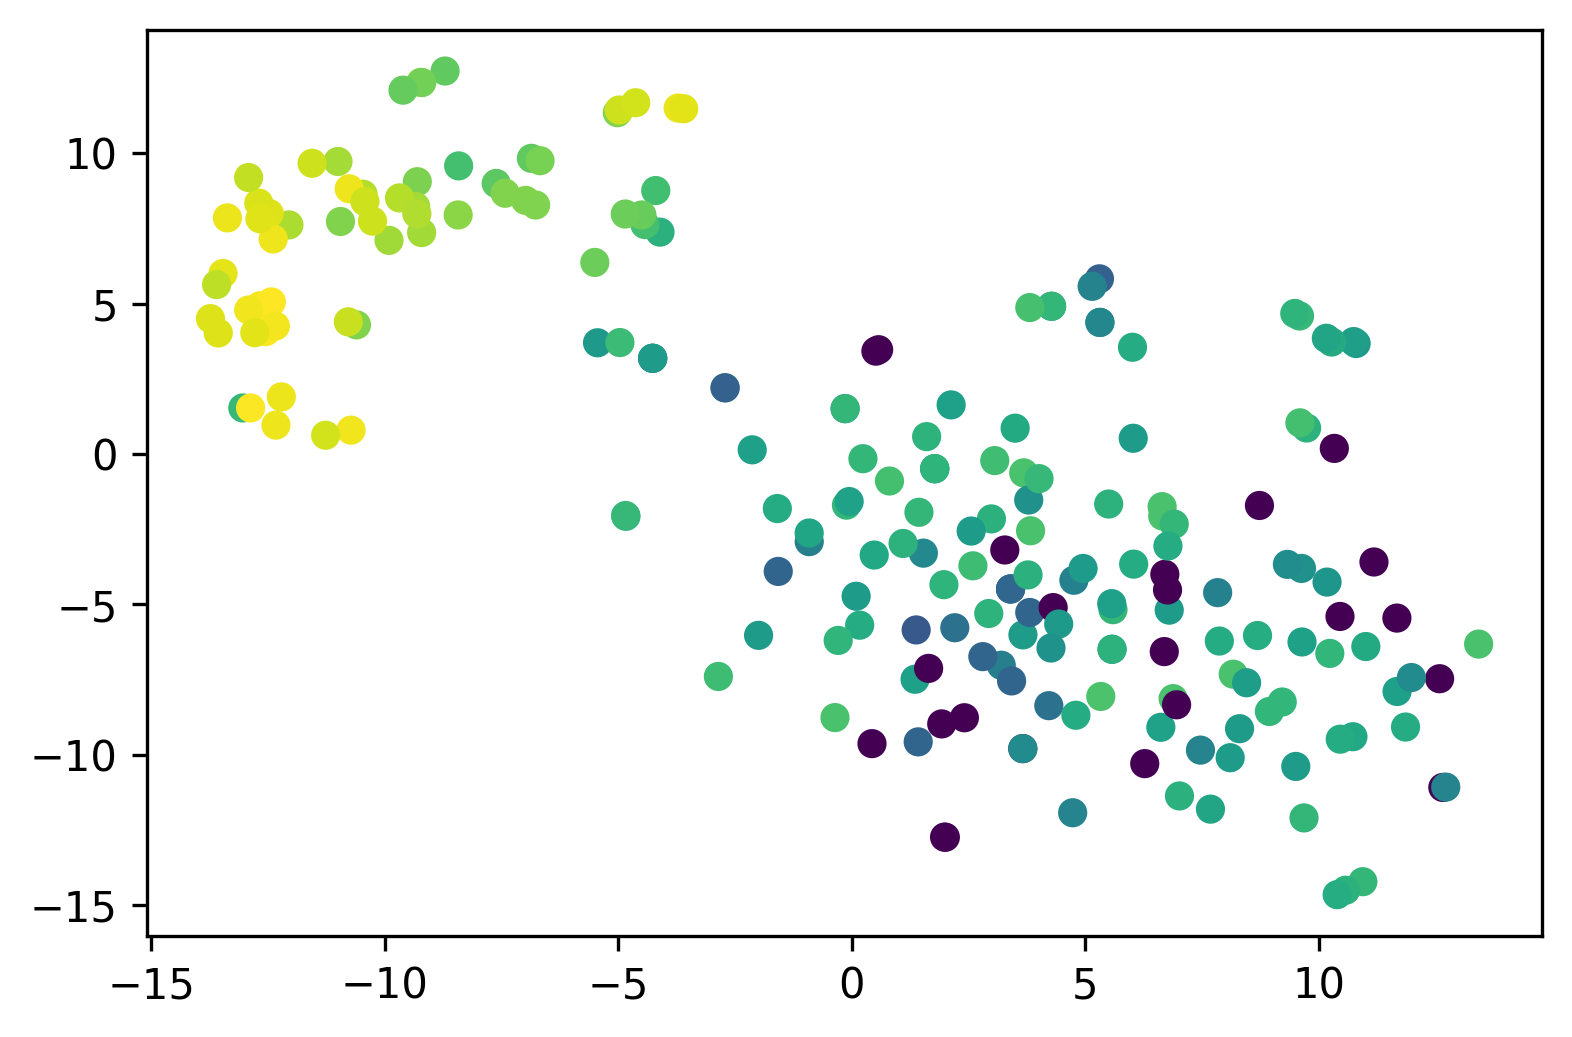

In [ ]:
from Bio import SeqIO
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import torch
import random

random.seed(2)

emb = embedder
s = time.time()
embeddings = emb.embed_many(X_activity)
print("Embedding took: ", time.time() - s)

# s = time.time()
# embeddings = list(embeddings)
# print("Listing took: ", time.time() - s)

s = time.time()
protein_embeds = np.zeros((len(X_activity), 1024))
for i, e in enumerate(embeddings):
    protein_embeds[i] = emb.reduce_per_protein(e)
print("Reshaping took: ", time.time() - s)

print(protein_embeds[0].shape)
tsne = TSNE(n_components=2).fit_transform(protein_embeds)
plt.scatter(tsne[:,0], tsne[:,1], c=y_activity)
plt.show()

In [ ]:
# np.save("prottrans_petase_seed_1.npy", protein_embeds)
np.save("prottrans_seed_2.npy", protein_embeds)

In [ ]:
protein_embeds_seed1 = np.load("prottrans_seed_1.npy")
protein_embeds_seed2 = np.load("prottrans_seed_2.npy")
random_embed_1 = np.load("prottrans_random.npy")
random_embed_2 = np.load("prottrans_random_2.npy")

In [ ]:
print(protein_embeds_seed1[0])

[ 0.01135602 -0.02649276  0.00570227 ...  0.04452793  0.00234546
 -0.02212404]


In [ ]:
print(protein_embeds_seed2[0])

[ 0.01135602 -0.02649276  0.00570227 ...  0.04452793  0.00234546
 -0.02212404]


In [ ]:
print(random_embed_1[0])

[ 1.26258838  0.35855049  0.65314394 ... -0.86616045  0.16429016
 -0.04005701]


In [ ]:
print(random_embed_2[0])

[ 0.94399208  0.58587414 -2.30861282 ...  0.46035397  1.80598176
  2.06652999]


In [ ]:
print(emb._model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31, 1024, padding_idx=0)
    (position_embeddings): Embedding(40000, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False

In [ ]:
np.save("prottrans_random_2.npy", protein_embeds)

In [ ]:
np.save("prottrans.npy", protein_embeds)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

def train_top_model(protein_embeds, k=None):
    n_train = 160
    if k is None:
        model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
    else:
        model = KNeighborsRegressor(n_neighbors=k)
    model.fit(protein_embeds[:n_train], y_activity[:n_train]) # train on first 200 sequences
    y_hat_train = model.predict(protein_embeds[:n_train])
    y_hat_test = model.predict(protein_embeds[n_train:])
    train_loss = np.mean((y_hat_train - y_activity[:n_train])**2)
    test_loss = np.mean((y_hat_test - y_activity[n_train:])**2)     # validate on 12
    plt.scatter(y_activity[:n_train], y_hat_train, label="Train")
    plt.scatter(y_activity[n_train:], y_hat_test, label="Test")
    plt.xlabel("Actual relative log catalytic activity")
    plt.ylabel("Predicted relative log catalytic activity")
    plt.title("Linear Model with L2 Regularization")
    plt.legend()
    plt.show()
    train_corr = model.score(protein_embeds[:n_train], y_activity[:n_train])
    test_corr = model.score(protein_embeds[n_train:], y_activity[n_train:])
    print(train_corr)
    print(test_corr)

In [ ]:
protein_embeds_pretrained = np.load("prottrans_petase.npy")
protein_embeds_random = np.load("prottrans_random_2.npy")

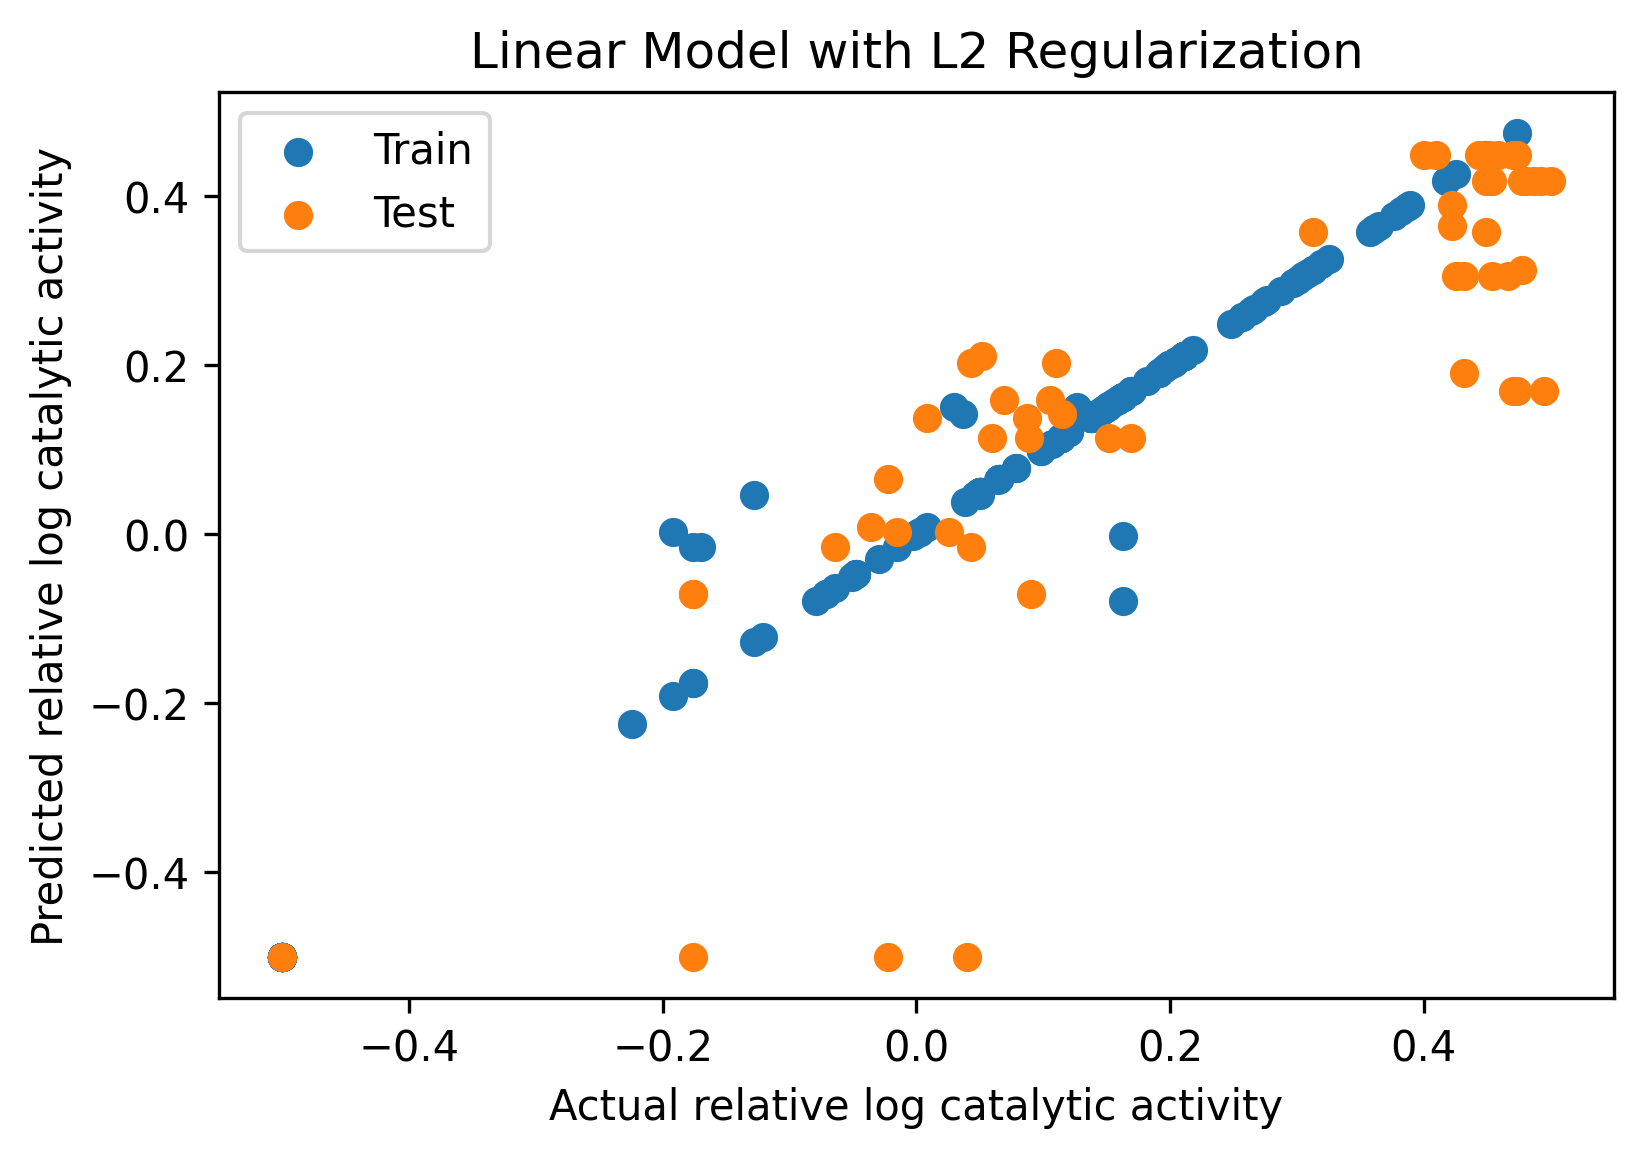

0.9781228350269436
0.5883974261476856


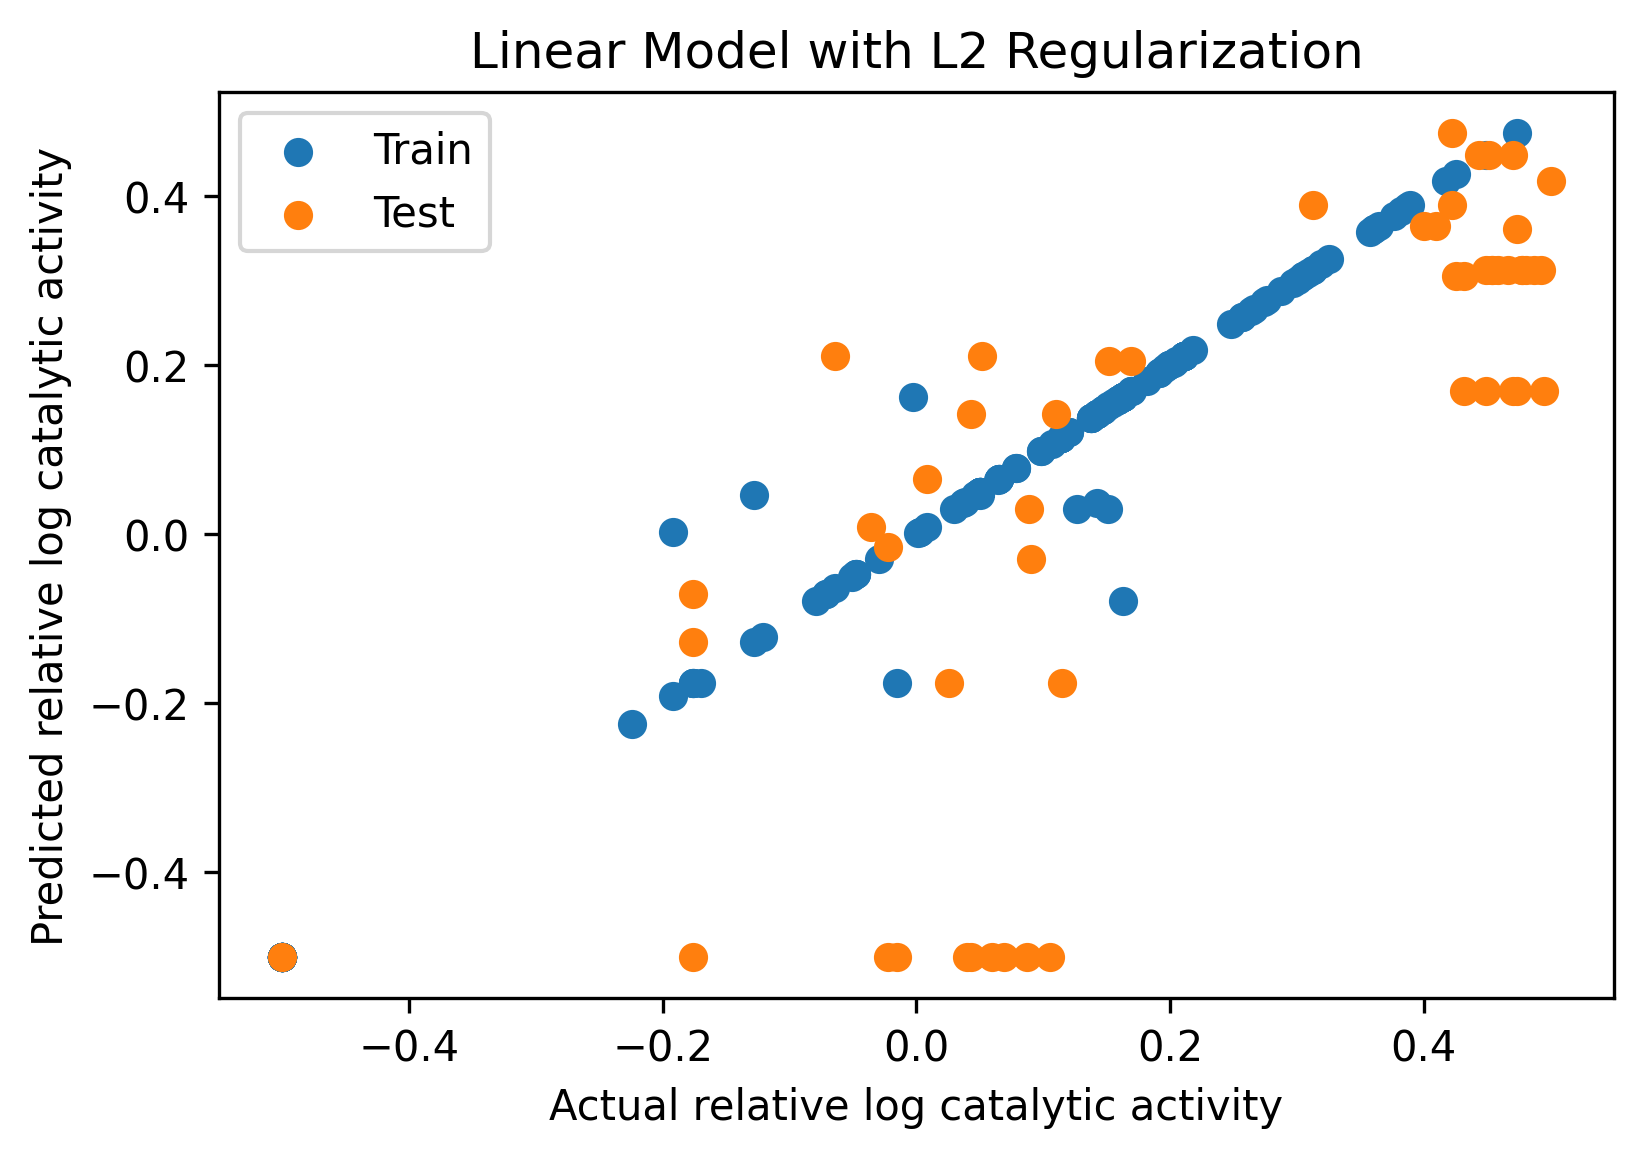

0.9795409737658726
-0.1287881514945668


In [ ]:
from sklearn.linear_model import RidgeCV

train_top_model(protein_embeds_pretrained, k=1)
train_top_model(protein_embeds_random, k=1)

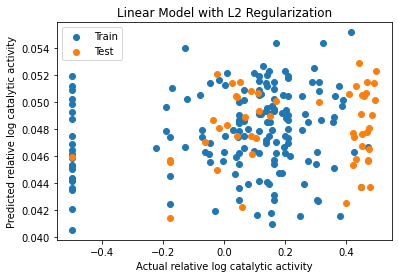

0.0038250652459540513
-0.5803945401199546


In [ ]:
protein_embeds = protein_embeds_pretrained.T  # result is (1024, len)
emb_mean = np.mean(protein_embeds, axis=1)
emb_cov = np.cov(protein_embeds)
emb_sampled = np.random.multivariate_normal(emb_mean, emb_cov, size=212)  # (212, 1024)
train_top_model(emb_sampled)

Raw code

In [ ]:
emb._model_directory

'/root/.cache/bio_embeddings/prottrans_bert_bfd/model_directory'

In [ ]:
!tar -czf /content/coward.tar.gz /root/.cache/bio_embeddings/prottrans_bert_bfd/model_directory/vocab.txt

tar: Removing leading `/' from member names


In [ ]:
from transformers import BertModel, BertTokenizer, BertConfig
import re

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
config = BertConfig(vocab_size=31,   # original model has 30 (31 is to make sure no weights are mysteriously loaded)
                    hidden_size=1024,
                    num_hidden_layers=30,
                    num_attention_heads=16,
                    intermediate_size=4096,
                    hidden_dropout_prob=0.0,
                    attention_probs_dropout_prob=0.0,
                    max_position_embeddings=40000)
model = BertModel(config).to(device)

tokenizer = BertTokenizer("vocab.txt", do_lower_case=False)

def random_emb(batch):
    """batch is a list of sequences"""
    seq_lens = [len(seq) for seq in batch]
    # Remove rare amino acids
    batch = [re.sub(r"[UZOB]", "X", sequence) for sequence in batch]
    # transformers needs spaces between the amino acids
    batch = [" ".join(list(seq)) for seq in batch]

    ids = tokenizer.batch_encode_plus(
        batch, add_special_tokens=True, pad_to_max_length=True
    )

    tokenized_sequences = torch.tensor(ids["input_ids"]).to(model.device)
    attention_mask = torch.tensor(ids["attention_mask"]).to(model.device)

    with torch.no_grad():
        embeddings = model(
            input_ids=tokenized_sequences, attention_mask=attention_mask
        )

    embeddings = embeddings[0].cpu().numpy()
    protein_embeds = np.zeros((len(X_activity), 1024))
    for i, e in enumerate(embeddings):
        protein_embeds[i] = e.mean(axis=0)

    return protein_embeds

raw_embeds = random_emb(X_activity)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


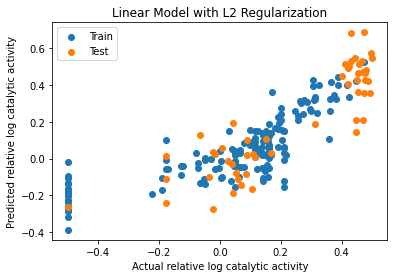

0.6340506406240781
0.6867237898975587


In [ ]:
train_top_model(raw_embeds)

In [ ]:
from bio_embeddings.embed import ProtTransBertBFDEmbedder,\
                                 BeplerEmbedder,\
                                 GloveEmbedder,\
                                 SeqVecEmbedder,\
                                 UniRepEmbedder,\
                                 Word2VecEmbedder
from Bio import SeqIO

sequences = []
for record in SeqIO.parse("max.fa", "fasta"):
    sequences.append(record)

embedder = ProtTransBertBFDEmbedder()

embeddings = embedder.embed_many([str(s.seq) for s in sequences])
embeddings = list(embeddings)

reduced_embeddings = [ProtTransBertBFDEmbedder.reduce_per_protein(e) for e in embeddings]

for (per_amino_acid, per_protein) in zip(embeddings, reduced_embeddings):
    print(per_amino_acid.shape, per_protein.shape)
    break

prottrans_bert_bfd.zip: 1.56GB [00:23, 67.8MB/s]                            
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



(6, 1024) (1024,)
